In [21]:
#Adventure Project
# Dependencies
import csv
import gmaps
import numpy as np
import pandas as pd
import requests
from scipy import stats as st
from matplotlib import pyplot as plt
#from config import (api_key, gkey) #api_key


In [22]:
#From Tony
#read in 2 CSV files, and build population and employment DataFrames
file = "resources/populationaus.csv"
file2 = "resources/employment.csv"
popu_df = pd.read_csv(file)
empl_df = pd.read_csv(file2)
popu_df.head()
popu_df.set_index("Year", inplace = True)
empl_df.set_index("Year", inplace = True)

In [23]:
#Turning both DataFrames 90 degree, and devide population DataFrame by 1000, to get it in the same unit with employment frame.
#
pop_df= popu_df.T
pop_df = pop_df/1000
#pop_df.head(10)

In [24]:
#calculate the population yearly change rate against 2012's value
pop_df["13_%"] = (pop_df[2013]-pop_df[2012])*100/pop_df[2012]
pop_df["14_%"] = (pop_df[2014]-pop_df[2012])*100/pop_df[2012]
pop_df["15_%"] = (pop_df[2015]-pop_df[2012])*100/pop_df[2012]
pop_df["16_%"] = (pop_df[2016]-pop_df[2012])*100/pop_df[2012]
pop_df["17_%"] = (pop_df[2017]-pop_df[2012])*100/pop_df[2012]
pop_df["18_%"] = (pop_df[2018]-pop_df[2012])*100/pop_df[2012]

In [25]:
#calculate the min, max, mean, std of the population change %
pop_df["min%"] = pop_df.iloc[:, 7:13].min(axis = 1)
pop_df["max%"] = pop_df.iloc[:, 7:13].max(axis = 1)
pop_df["mean%"] = (pop_df.iloc[:, 7:13].mean(axis = 1))/6 #to calculate the average change % per year.
pop_df["SD%"] = pop_df.iloc[:, 7:13].std(axis = 1)

In [26]:
#turning employment frame 90 degree
emp_df = empl_df.T
#emp_df.head(10)

In [27]:
#calculate the employment yearly change rate against 2012's value
emp_df["13_%"] = (emp_df[2013]-emp_df[2012])*100/emp_df[2012]
emp_df["14_%"] = (emp_df[2014]-emp_df[2012])*100/emp_df[2012]
emp_df["15_%"] = (emp_df[2015]-emp_df[2012])*100/emp_df[2012]
emp_df["16_%"] = (emp_df[2016]-emp_df[2012])*100/emp_df[2012]
emp_df["17_%"] = (emp_df[2017]-emp_df[2012])*100/emp_df[2012]
emp_df["18_%"] = (emp_df[2018]-emp_df[2012])*100/emp_df[2012]


In [28]:
#calculate the correlation coefficient of population change % vs employment change %
#and fill the results into column "corr".
corr=[]
for i in range(9):
    p = pop_df.iloc[i, 7:13]
    e = emp_df.iloc[i, 7:13]
    c = round(st.pearsonr(p, e)[0],2)
    corr.append(c)
pop_df["corr"] = corr 

In [29]:
#calculate the min, max, mean, std, corr for employment change %
emp_df["min%"] = emp_df.iloc[:, 7:13].min(axis = 1)
emp_df["max%"] = emp_df.iloc[:, 7:13].max(axis = 1)
emp_df["mean%"] = (emp_df.iloc[:, 7:13].mean(axis = 1))/6 #to calculate the average change % per year.
emp_df["SD%"] = emp_df.iloc[:, 7:13].std(axis = 1)
emp_df["corr"] = corr #correlation of employment change % vs employment change %

In [30]:
pop_df.head(10)

Year,2012,2013,2014,2015,2016,2017,2018,13_%,14_%,15_%,16_%,17_%,18_%,min%,max%,mean%,SD%,corr
AUS,22522.197,23297.777,23640.331,23984.581,24389.684,24773.350,25171.291,3.443625,4.964587,6.493079,8.291762,9.995264,11.762147,3.443625,11.762147,1.248624,3.127782,0.99
NSW,7258.722,7454.938,7562.171,7671.401,7801.785,7919.815,8036.665,2.703176,4.180474,5.685285,7.481524,9.107567,10.717355,2.703176,10.717355,1.107649,3.029224,0.98
VIC,5591.818,5832.585,5957.512,6093.049,6244.863,6387.081,6528.601,4.305702,6.539805,8.963650,11.678581,14.221904,16.752745,4.305702,16.752745,1.735066,4.705382,1.00
QLD,4518.649,4685.439,4747.263,4804.933,4883.821,4963.072,5050.651,3.691148,5.059344,6.335610,8.081442,9.835307,11.773475,3.691148,11.773475,1.243787,3.028727,0.95
SA,1647.183,1678.052,1693.107,1705.937,1717.400,1728.494,1743.594,1.874048,2.788033,3.566938,4.262854,4.936367,5.853084,1.874048,5.853084,0.646703,1.447052,0.96
WA,2385.947,2502.188,2528.619,2547.745,2563.708,2582.563,2606.394,4.871902,5.979680,6.781291,7.450333,8.240585,9.239392,4.871902,9.239392,1.182311,1.569812,0.55
TAS,511.739,513.015,514.040,515.694,519.810,524.969,531.777,0.249346,0.449643,0.772855,1.577171,2.585302,3.915668,0.249346,3.915668,0.265277,1.425833,0.80
NT,232.952,242.304,242.753,244.090,246.183,246.858,245.796,4.014561,4.207305,4.781242,5.679711,5.969470,5.513582,4.014561,5.969470,0.837941,0.813434,0.65
ACT,372.070,386.318,391.981,398.874,407.489,415.874,423.169,3.829387,5.351412,7.204021,9.519445,11.773053,13.733706,3.829387,13.733706,1.428084,3.808503,0.90


In [31]:
emp_df.head(10)

Year,2012,2013,2014,2015,2016,2017,2018,13_%,14_%,15_%,16_%,17_%,18_%,min%,max%,mean%,SD%,corr
AUS,11395.5,11417.8,11597.3,11905.9,12036.6,12451.9,12722.8,0.195691,1.770874,4.478961,5.625905,9.270326,11.647580,0.195691,11.647580,0.916370,4.361388,0.99
NSW,3570.9,3569.6,3627.7,3797.3,3812.6,3953.7,4045.7,-0.036405,1.590635,6.340138,6.768602,10.719987,13.296368,-0.036405,13.296368,1.074426,5.116755,0.98
VIC,2856.8,2869.4,2956.6,3013.6,3149.1,3239.0,3359.7,0.441053,3.493419,5.488659,10.231728,13.378605,17.603612,0.441053,17.603612,1.406585,6.461178,1.00
QLD,2277.6,2304.1,2321.7,2378.2,2355.6,2458.0,2514.1,1.163505,1.936249,4.416930,3.424658,7.920618,10.383737,1.163505,10.383737,0.812380,3.587388,0.95
SA,814.6,798.7,797.6,808.9,817.0,831.5,845.6,-1.951878,-2.086914,-0.699730,0.294623,2.074638,3.805549,-2.086914,3.805549,0.039897,2.331693,0.96
WA,1315.0,1311.7,1317.7,1322.8,1294.1,1342.8,1338.6,-0.250951,0.205323,0.593156,-1.589354,2.114068,1.794677,-1.589354,2.114068,0.079637,1.364059,0.55
TAS,233.4,228.3,241.1,237.2,239.6,249.1,247.2,-2.185090,3.299057,1.628106,2.656384,6.726650,5.912596,-2.185090,6.726650,0.501047,3.204548,0.80
NT,129.8,135.5,131.6,135.9,141.7,137.7,134.8,4.391371,1.386749,4.699538,9.167951,6.086287,3.852080,1.386749,9.167951,0.821777,2.582905,0.65
ACT,215.9,213.9,213.7,218.9,225.1,235.8,228.8,-0.926355,-1.018990,1.389532,4.261232,9.217230,5.974988,-1.018990,9.217230,0.524934,4.077329,0.90


In [32]:
#build a new DataFrame to show the correlationship of the mean % for population vs employment
pe_df = pd.DataFrame(index = ['AUS', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'])
pe_df["pmean"] = pop_df["mean%"]
pe_df["emean"] = emp_df["mean%"]
pe_df["corr"] = emp_df["corr"]

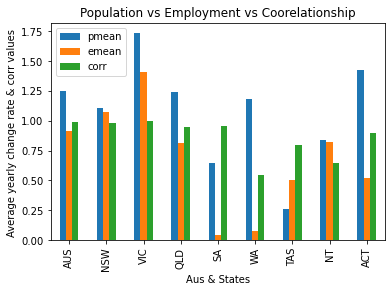

In [33]:
#Charts to answer what is the yearly average change rate for population, employment and its change rates correlationship corr
#over the whole country?

pe_df.plot(kind = "bar")
plt.xlabel("Aus & States")
plt.ylabel("Average yearly change rate & corr values ")
plt.title("Population vs Employment vs Coorelationship")
plt.savefig("results/Pop_Emp_Corr")

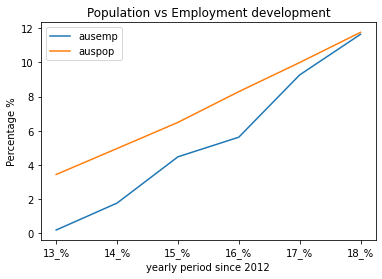

In [34]:
#Charts to show how the national/state 2012 -2018 population vs employment developed?
#For the charts of other states/territories, can be referred in the result folder or print by manually selection.

emp_df.iloc[0, 7:13].plot(label = "ausemp")
pop_df.iloc[0, 7:13].plot(label = "auspop")
# emp_df.iloc[1, 7:13].plot(label = "nswemp")
# pop_df.iloc[1, 7:13].plot(label = "nswpop")
# emp_df.iloc[2, 7:13].plot(label = "vicemp")
# pop_df.iloc[2, 7:13].plot(label = "vicpop")
# emp_df.iloc[3, 7:13].plot(label = "qldemp")
# pop_df.iloc[3, 7:13].plot(label = "qldpop")
# emp_df.iloc[4, 7:13].plot(label = "saemp")
# pop_df.iloc[4, 7:13].plot(label = "sapop")
# emp_df.iloc[5, 7:13].plot(label = "waemp")
# pop_df.iloc[5, 7:13].plot(label = "wapop")
# emp_df.iloc[6, 7:13].plot(label = "tasemp")
# pop_df.iloc[6, 7:13].plot(label = "taspop")
# emp_df.iloc[7, 7:13].plot(label = "ntemp")
# pop_df.iloc[7, 7:13].plot(label = "ntpop")
# emp_df.iloc[8, 7:13].plot(label = "actemp")
# pop_df.iloc[8, 7:13].plot(label = "actpop")
plt.legend()
plt.xlabel("yearly period since 2012")
plt.ylabel("Percentage %")
plt.title("Population vs Employment development")
plt.savefig("results/National")


In [35]:
#From Mara
# Australian Population vs Underemployment Over Industries
# Ref.:ABS Data 6291019 -'Underemployed persons by Industry division/Occupation major group of main job and Sex.

#read csv files
underempl_final = pd.read_csv (r'Resources\underempl_final.csv')
underempl_gender_ratio = pd.read_csv (r'Resources\underempl_gender_ratio.csv')
population = pd.read_csv (r'Resources\populationaus.csv')


In [36]:
#Preview Data 1 - "Underemployed persons by Industry.""
under_df = pd.DataFrame(underempl_final)
under_df = under_df.set_index(['Year'])
under_df_tr =  under_df.T
# under_df_tr.head()

In [37]:
#Preview Data 2 - Underemployment ratio (proportion of employed) by Gender
under_gender_df = pd.DataFrame(underempl_gender_ratio)
under_gender_df = under_gender_df.set_index(['Year'])
under_gender_df_tr = under_gender_df.T.head()
# under_gender_df_tr

In [38]:
#Preview Data 3 - Australia Population (2012 -2018)
#Remove data for states as n/a
au_pop_df = pd.DataFrame(population)
au_pop_df = au_pop_df.set_index(['Year'])
au_pop_df = au_pop_df.drop(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'], axis=1)
au_pop_df = au_pop_df/1000
au_pop_df_tr = au_pop_df.T
# au_pop_df_tr

In [39]:
# Get Yearly change rate (base year 2012) for Data 1 - 'Underemployed persons by Industry...'
# Loc index rows to create new data frame to hold Yearly change calculation
# Calculate yearly change ( YC = year - baseyear)*100/baseyear

under_perc_df = under_df_tr.iloc[:,1:1]

under_perc_df["(2012 - 2013)"] = (under_df_tr[2013] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2014)"] = (under_df_tr[2014] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2015)"] = (under_df_tr[2015] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2016)"] = (under_df_tr[2016] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2017)"] = (under_df_tr[2017] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2018)"] = (under_df_tr[2018] - under_df_tr[2012] )*100/under_df_tr[2012]

#Preview data
under_perc_df.head()

# # format columns values by 2f >>
under_perc_df_formated = under_perc_df.applymap('{:.2f}%'.format)
under_perc_df_formated.head()

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Year,(2012 - 2013),(2012 - 2014),(2012 - 2015),(2012 - 2016),(2012 - 2017),(2012 - 2018)
Agriculture (empl - TM),7.01%,6.95%,5.52%,-2.03%,7.61%,10.67%
Agriculture (empl - Males),10.98%,7.51%,6.15%,-0.29%,9.56%,16.83%
Agriculture (empl - Females),-1.67%,5.63%,4.06%,-5.83%,3.23%,-2.60%
Agriculture(Underempl - TM),63.93%,57.38%,-6.56%,62.30%,9.84%,54.10%
Agriculture (Underempl - Males),80.33%,93.44%,-24.59%,86.89%,18.03%,98.36%


In [40]:
# Get Yearly change rate (base year 2012) for Data 3 - 'Australia Population '

# Loc index rows to create new data frame to hold Yearly change calculation values
# Calculate yearly change ( YC = year - baseyear)*100/baseyear

au_pop_df = au_pop_df.T
pop_perc_df = au_pop_df.iloc[:,1:1]
pop_perc_df
pop_perc_df["(2012 - 2013)"] = (au_pop_df_tr[2013] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2014)"] = (au_pop_df_tr[2014] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2015)"] = (au_pop_df_tr[2015] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2016)"] = (au_pop_df_tr[2016] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2017)"] = (au_pop_df_tr[2017] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2018)"] = (au_pop_df_tr[2018] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]

# # # Preview data
pop_perc_df

# # format columns values by 2f >>
pop_perc_formated = pop_perc_df.applymap('{:.2f}%'.format)
pop_perc_formated


C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Year,(2012 - 2013),(2012 - 2014),(2012 - 2015),(2012 - 2016),(2012 - 2017),(2012 - 2018)
AUS,3.44%,4.96%,6.49%,8.29%,10.00%,11.76%


In [41]:
#Pearson’s Correlation (AU Population vs Underemployment)¶
pop_perc_df_tr = pop_perc_df.T
x = pop_perc_df_tr['AUS']

under_perc_df_tr=under_perc_df.T
y = under_perc_df_tr['Underemployed Total (M)']

from scipy.stats import pearsonr
corr, _ = pearsonr(x, y)
print('Pearsons correlation is  %.3f' % corr + ' showing positive correlation between population and Underemployment variables ')


Pearsons correlation is  0.812 showing positive correlation between population and Underemployment variables 


In [42]:
#Figure 1. AU Population Growth vs Total Underemployment Over Industries
# Create new df get Total Undemployment Over Industries 
under_perc_ind_df = under_perc_df.iloc[243:249,0:7]
under_perc_ind_df = under_perc_ind_df.T 


#merge dataframes (Population and Total Undemployment Over Industries )
#remove unnecessary columns 


merged_pop_total_under = pop_perc_df_tr.merge(under_perc_ind_df, on=['Year'])
figure1_data = merged_pop_total_under.drop(['Employed Total - Males','Employed Total -  Females ', 
       'Underemployed total - Males', 'Underemployed total - Females'], axis=1)

figure1_data = figure1_data.rename(columns={'AUS':'Australian Population','Employed Total (M)':'Total Employed)', 'Underemployed Total (M)':'Total Underemployed '})

#preview data
figure1_data

# # format columns values by 2f >>
figure1_data_formated = figure1_data.applymap('{:.2f}%'.format)
figure1_data_formated

,Australian Population,Total Employed),Total Underemployed
Year,,,
(2012 - 2013),3.44%,0.59%,7.17%
(2012 - 2014),4.96%,1.79%,25.36%
(2012 - 2015),6.49%,4.90%,27.05%
(2012 - 2016),8.29%,5.94%,26.48%
(2012 - 2017),10.00%,9.45%,30.02%
(2012 - 2018),11.76%,11.98%,32.19%


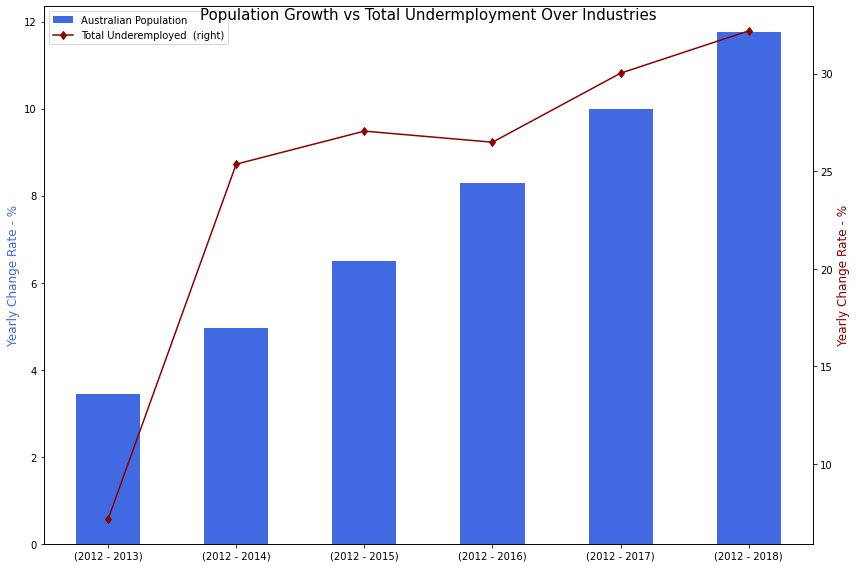

In [43]:
# Plot data
figure1_data.index.names = ['']
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.suptitle('Population Growth vs Total Undermployment Over Industries', fontsize=15)
figure1_data['Australian Population'].plot(kind='bar', color='royalblue',legend= True)
figure1_data['Total Underemployed '].plot(kind='line', marker='d',color='darkred',secondary_y=True, legend= True,)

plt.ylabel('Yearly Change Rate - %', color='darkred',fontsize=12)
ax1.set_ylabel('Yearly Change Rate - %', color='royalblue',fontsize=12)



plt.tight_layout()
plt.savefig("results/Pop_vs_Underemployment_ind")



In [44]:
#Figure 2 - AU Population Growth vs Total Undermployment By Gender
#merge yearly change dataframes (Population and Selected data for gender plot )
#remove unnecessary columns
merged_pop_total_under = pop_perc_df_tr.merge(under_perc_ind_df, on=['Year'])
figure2_data = merged_pop_total_under.drop(['Employed Total - Males','Employed Total -  Females ','Employed Total (M)', 'Underemployed Total (M)'], axis=1)

#preview data
figure2_data

#rename columns for better display
figure2_data = figure2_data.rename(columns={'AUS':'Australian Population',
                              'Underemployed total - Males':'Underemployed - Males',
                              'Underemployed total - Females':'Underemployed - Females',})

figure2_final = figure2_data
figure2_final

# # format columns values by 2f >>
figure2_data_formated = figure2_final.applymap('{:.2f}%'.format)
figure2_data_formated

,Australian Population,Underemployed - Males,Underemployed - Females
Year,,,
(2012 - 2013),3.44%,8.95%,6.00%
(2012 - 2014),4.96%,30.90%,21.68%
(2012 - 2015),6.49%,31.72%,23.98%
(2012 - 2016),8.29%,32.41%,22.55%
(2012 - 2017),10.00%,36.16%,25.96%
(2012 - 2018),11.76%,37.59%,28.63%


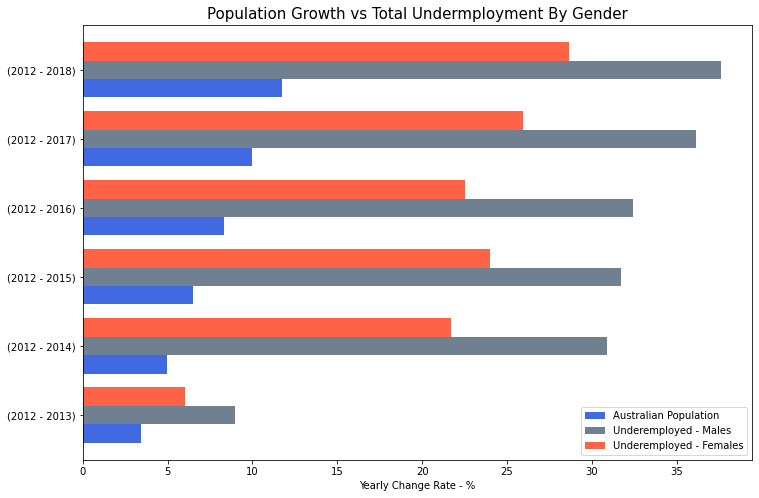

In [45]:
#Plot figure2_data

figure2_final.index.names = ['']
my_colors = 'royalblue', 'slategray', 'tomato'
figure2_final.plot(kind='barh',figsize=(12,8),width=0.8,color=my_colors)
plt.title("Population Growth vs Total Undermployment By Gender",fontsize=15)
plt.xlabel("Yearly Change Rate - %")
plt.savefig("results/Pop_vs_Under_by_Gender")


plt.show()

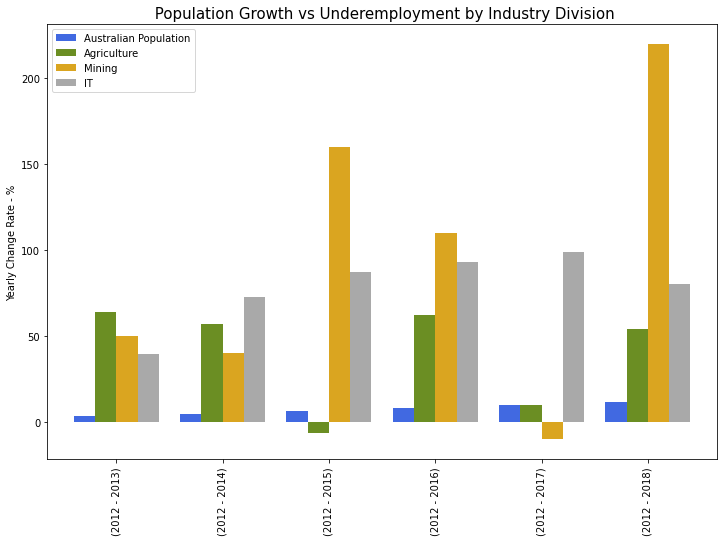

In [46]:
#Figure 3 - AU Population Growth vs Underemployment by Industry Division
#Make list of all Underemployed category for each industry
# print(list(under_perc_df.index)) ## to  get all categories listed in the index

selected_columns = ['Agriculture(Underempl - TM)',
                    'Mining (Underempl - TM)', 
                    'Manufacturing (Underempl - TM)',
                    'Electricity, Gas, Water and Waste Services (Underempl - TM)', 
                    'Construction (Underempl - TM)',
                    'Wholesale Trade (Underempl - TM)',
                    'Retail Trade (Underempl - TM)',            
                    'Accommodation and Food Services (Underempl - TM)',
                    'Information Media and Telecommunications (Underempl - TM)',  
                    'Financial (Underempl - TM)', 
                   'Rental, Hiring and Real Estate Services (Underempl - TM)',  
                   'Professional, Scientific and Technical Services (Underempl - TM)',
                    'Administrative and Support Services  (Underempl - TM)', 
                    'Administrative and Support Services (Underempl ratio - Males )', 
                     'Public Administration and Safety (Underempl - TM)',
                   'Education and Training (Underempl - TM)', 
                    'Health Care and Social Assistance (Underempl - TM)',
                    'Arts and Recreation Services (Underempl - TM)',
                    'Other Services (Underempl - TM)', 
                    'Managers (Underempl - TM)', 
                    'Technicians and Trades Workers (Underempl - TM)',
                    'Community and Personal Service Workers (Underempl - TM)',
                    'Clerical and Administrative Workers (Underempl - TM)',
                    'Sales Workers (Underempl - TM)', 
                    'Machinery Operators and Drivers (Underempl - TM)', 
                    'Labourers (empl - Females)', 'Labourers  (Underempl - TM)']

# Create a new data frame to hold the categories values for ploting
selected_ocupations_df = under_perc_df.loc[selected_columns]
ocupations_df = selected_ocupations_df

#Get top 3 ocupations with hightes % change 
top_3_perc_change_ocupations = ocupations_df.nlargest(3,['(2012 - 2013)', '(2012 - 2014)', '(2012 - 2015)', '(2012 - 2016)',
       '(2012 - 2017)', '(2012 - 2018)'])
top_3_perc_change_ocupations_tr = top_3_perc_change_ocupations.T

#rename columns for better display
top_3_perc_change_ocupations_tr = top_3_perc_change_ocupations_tr.rename(columns={'Agriculture(Underempl - TM)':'Agriculture',
                              'Mining (Underempl - TM)':'Mining',
                              'Manufacturing (Underempl - TM)':'Manufacturing',
                              'Information Media and Telecommunications (Underempl - TM)':'IT',
                              'Managers (Underempl - TM)':'Managers',
                              'Electricity, Gas, Water and Waste Services (Underempl - TM)':'Electricity, Gas, Water and Waste Services ',
                              'Professional, Scientific and Technical Services (Underempl - TM)':'Professional, Scientific and Technical Services'})

top_3_perc_final = top_3_perc_change_ocupations_tr
top_3_perc_final

merged_pop_ocupation = pop_perc_df_tr.merge(top_3_perc_final, on=['Year'])
merged_pop_ocupation = merged_pop_ocupation.rename(columns={'AUS':'Australian Population'})

#Plot Horizontal Bar Chart
merged_pop_ocupation.index.names = ['']
my_colors = 'royalblue', 'olivedrab', 'goldenrod','darkgrey'
merged_pop_ocupation.plot(kind='bar',figsize=(12,8),width=0.8, color=my_colors)
plt.title(" Population Growth vs Underemployment by Industry Division",fontsize=15)
plt.savefig("results/Pop_vs_top3_industries")
plt.ylabel("Yearly Change Rate - %")
plt.show()

In [47]:
stast = merged_pop_ocupation
stast = stast.describe()

# # format columns values by 2f >>
stast_formated = stast.applymap('{:.2f}'.format)
stast_formated

,Australian Population,Agriculture,Mining,IT
count,6.00,6.00,6.00,6.00
mean,7.49,40.16,95.00,78.79
std,3.13,30.49,85.03,21.21
min,3.44,-6.56,-10.00,39.77
25%,5.35,20.90,42.50,74.72
50%,7.39,55.74,80.00,84.09
75%,9.57,61.07,147.50,91.76
max,11.76,63.93,220.00,98.86


In [48]:
# Background
# For this section, a preliminary data analysis was undertaken for the years 2012 – 2018 to identify the relationship between Population growth and Underemployment rate by industries.

# Only data for employed people was considered and analysed for the rate of underemployment, as per definition below from Australian Bureau of Statistics (ABS) (1).

#  “The Australian Bureau of Statistics (ABS) identifies two distinct groups as underemployed:
#     -part-time workers who wanted to work more hours and could start additional hours either in the reference week or in the subsequent four weeks; and
#     -full-time workers who worked part-time hours in the reference week for economic reasons (such as being stood down or insufficient work being available). It is assumed these people wanted to work full-time and would have done so, had the work been available.” 
# In terms of correlation, taking into account the data analysis 'Underemployment - Australian Social Trends' realised in June 2010 (2):

# “Although underemployed workers make up a small proportion of employed people, underemployment has been increasing over the last 30 years. Unlike the unemployment rate, which rises and falls with the business cycle, historically, the underemployment rate has tended to rise in economic downturns but not recover as quickly when the economy begins to improve.” (2)
# Based on the above, we would expect in our preliminary analysis to find a level of correlation for the two variables for the period of 2012 - 2018.

# Data Collection and manipulation
# From the several datasets available from ABS, the “6291019 - Table 19. Underemployed persons by Industry division (ANZSIC), Occupation major group (ANZSCO) of main job and Sex” (3) was selected. To plot the relationship between Population growth and Underemployment rate in Australia during 2012 to 2018, the following has been done:

# Australian Population Data:
# Read original data for the population previously calculated.
# Create new data frame to hold a new selection of data.
# Removed states data and calculated yearly change rate (base year 2012) for the overall Australia Population and add to the new data frame for plotting.
# Underemployed Data:
# Uploaded original data from ABS and remove irrelevant information such as (years outside of the study period, update columns names, etc and save as csv file.
# Calculated the yearly change rate (base year 2012)
# Create new data frame to hold data selection for the total number of Underemployment over all Industries and merge to the population data frame.
# Create new data frame to hold data selection for the total number of Underemployment by gender and merge to the population data frame.
# Create new data frame for selected Industry category and merge to the population data frame.
# Subsequent to the above, the following charts were generated:

# -    Figure 1. AU Population Growth vs Total Underemployment Over Industries
# -    Figure 2. AU Population Growth vs Total Undermployment  By Gender
# -    Figure 3. AU Population Growth vs Underemployment by Industry Division
# Observations
# From the above preliminary analysis, the following was observed:

# Pearsons correlation is 0.812, showing positive correlation between population growth and Underemployment.

# Over the period of 2012 -2014, the underemployment showed a significant increase over population growth (4.96% and 25.36%) compared with 2012 -2014 (3.44% and 7.17%).

# Males have consistently represented the greater share of underemployed workers.

# In terms of underemployment over the total industry/ocupation listed, agriculture, mining and IT had the highest increase. From 2015 onwards mining had the highest increase overall.

#(1)_https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/rp/rp1819/Quick_Guides/Underemployment 
#(2)_https://www.abs.gov.au/ausstats/abs@.nsf/lookup/4102.0main+features60jun+2010#:~:text=Factors%20contributing%20to%20income%2Drelated,of%20training%20or%20deficient%20infrastructure. 
#(3)_https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/latest-release#underemployment-and-underutilisation

In [49]:
#From Adeniyi
#Australian population vs employment over hourly working time

population_df = pd.read_csv('resources/populationaus.csv')

hours_wkd_df = pd.read_csv('resources/Anual_average_hours_worked_aus.csv')

emp_df = pd.read_csv('resources/employment.csv')

population_df

popaus_df= population_df[['Year','AUS']]

popaus_df.set_index('Year',inplace = True)

hours_wkd_df.set_index('Year',inplace = True)

ch_popaus_df = popaus_df.T
ch_popaus_df

ch_hours_wkd_df = hours_wkd_df.T

ch_hours_wkd_df

# emp_df

# empaus_df = emp_df[['Year','AUS']]

# empaus_df.set_index('Year',inplace= True)

# new_df = pd.concat([hours_wkd_df,empaus_df], axis=1)

# new_df

# new_df['ave hours per employed']=new_df['Average Hours worked(m)']/new_df['AUS']

# new_df

# ch_empaus_df = empaus_df.T

# ch_empaus_df

Year,2012,2013,2014,2015,2016,2017,2018
Average Hours worked(m),1592.5,1607.0,1607.92,1639.67,1660.17,1699.58,1738.25


In [50]:
# population_df = pd.read_csv('resources/populationaus.csv')

# hours_wkd_df = pd.read_csv('resources/Anual_average_hours_worked_aus.csv')

# emp_df = pd.read_csv('resources/employment.csv')

# # population_df

# # popaus_df= population_df[['Year','AUS']]

# # popaus_df.set_index('Year',inplace = True)

# hours_wkd_df.set_index('Year',inplace = True)

# # ch_popaus_df = popaus_df.T
# # ch_popaus_df

# # ch_hours_wkd_df = hours_wkd_df.T

# # ch_hours_wkd_df

emp_df

empaus_df = emp_df[['Year','AUS']]

empaus_df.set_index('Year',inplace= True)

new_df = pd.concat([hours_wkd_df,empaus_df], axis=1)

new_df

new_df['ave hours per employed']=new_df['Average Hours worked(m)']/new_df['AUS']

new_df
ch_new_df=pd.DataFrame(new_df['ave hours per employed'])

ch_new_df

re_new_df = ch_new_df.T

re_new_df

Year,2012,2013,2014,2015,2016,2017,2018
ave hours per employed,0.139748,0.140745,0.138646,0.137719,0.137927,0.136492,0.136625


In [51]:
# Calculating percentage change in hours worked per employed comparded 2012

re_new_df['2013%'] = round((re_new_df[2013]-re_new_df[2012])*100/re_new_df[2012],2)

re_new_df['2014%'] =  round((re_new_df[2013]-re_new_df[2012])*100/re_new_df[2012],2)
re_new_df['2015%'] =  round((re_new_df[2013]-re_new_df[2012])*100/re_new_df[2012],2)
re_new_df['2016%'] =  round((re_new_df[2013]-re_new_df[2012])*100/re_new_df[2012],2)

re_new_df['2017%'] =  round((re_new_df[2013]-re_new_df[2012])*100/re_new_df[2012],2)

re_new_df['2018%'] =  round((re_new_df[2013]-re_new_df[2012])*100/re_new_df[2012],2)

re_new_df.head()

Year,2012,2013,2014,2015,2016,2017,2018,2013%,2014%,2015%,2016%,2017%,2018%
ave hours per employed,0.139748,0.140745,0.138646,0.137719,0.137927,0.136492,0.136625,0.71,0.71,0.71,0.71,0.71,0.71


In [52]:
# Calculating percentage change in population compared to 2012

ch_popaus_df['2013%'] = round((ch_popaus_df[2013]-ch_popaus_df[2012])*100/ch_popaus_df[2012],2)

ch_popaus_df['2014%'] = round((ch_popaus_df[2014]-ch_popaus_df[2012])*100/ch_popaus_df[2012],2)

ch_popaus_df['2015%'] = round((ch_popaus_df[2015]-ch_popaus_df[2012])*100/ch_popaus_df[2012],2)

ch_popaus_df['2016%'] = round((ch_popaus_df[2016]-ch_popaus_df[2012])*100/ch_popaus_df[2012],2)

ch_popaus_df['2017%'] = round((ch_popaus_df[2017]-ch_popaus_df[2012])*100/ch_popaus_df[2012],2)

ch_popaus_df['2018%'] = round((ch_popaus_df[2016]-ch_popaus_df[2012])*100/ch_popaus_df[2012],2)

ch_popaus_df.head()

Year,2012,2013,2014,2015,2016,2017,2018,2013%,2014%,2015%,2016%,2017%,2018%
AUS,22522197,23297777,23640331,23984581,24389684,24773350,25171291,3.44,4.96,6.49,8.29,10.0,8.29


In [53]:
ch_hours_wkd_df['2013%'] = round((ch_hours_wkd_df[2013]-ch_hours_wkd_df[2012])*100/ch_hours_wkd_df[2012],2)

ch_hours_wkd_df['2014%'] = round((ch_hours_wkd_df[2014]-ch_hours_wkd_df[2012])*100/ch_hours_wkd_df[2012],2)

ch_hours_wkd_df['2015%'] = round((ch_hours_wkd_df[2015]-ch_hours_wkd_df[2012])*100/ch_hours_wkd_df[2012],2)

ch_hours_wkd_df['2016%'] = round((ch_hours_wkd_df[2016]-ch_hours_wkd_df[2012])*100/ch_hours_wkd_df[2012],2)

ch_hours_wkd_df['2017%'] = round((ch_hours_wkd_df[2017]-ch_hours_wkd_df[2012])*100/ch_hours_wkd_df[2012],2)

ch_hours_wkd_df['2018%'] = round((ch_hours_wkd_df[2018]-ch_hours_wkd_df[2012])*100/ch_hours_wkd_df[2012],2)

ch_hours_wkd_df


Year,2012,2013,2014,2015,2016,2017,2018,2013%,2014%,2015%,2016%,2017%,2018%
Average Hours worked(m),1592.5,1607.0,1607.92,1639.67,1660.17,1699.58,1738.25,0.91,0.97,2.96,4.25,6.72,9.15


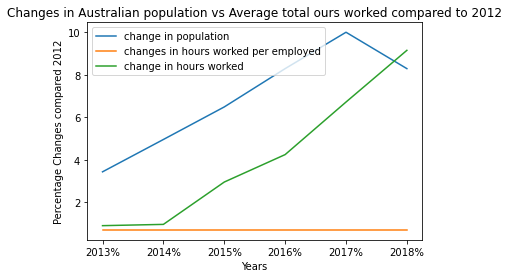

In [54]:
hr_plt_df = ch_hours_wkd_df[['2013%','2014%','2015%','2016%','2017%','2018%']]

pop_change = ch_popaus_df[['2013%','2014%','2015%','2016%','2017%','2018%']]

ind_hour_df = re_new_df[['2013%','2014%','2015%','2016%','2017%','2018%']]

pop_plt_df = pop_change.T

hr_plt_df = hr_plt_df.T

ind_hour_df = ind_hour_df.T


plt.plot(pop_plt_df,label='change in population')

plt.plot(ind_hour_df,label='changes in hours worked per employed')

plt.plot(hr_plt_df,label='change in hours worked')
plt.title('Changes in Australian population vs Average total ours worked compared to 2012')
plt.xlabel('Years')
plt.ylabel('Percentage Changes compared 2012')
plt.legend(loc='best')
plt.savefig('results/Change in population vs average hours worked ')

plt.show()

In [55]:
# Change in hours average worked annulay compared to 2012 as a percentage of Changes in annual population compared to 2012

hours_comp_df = pd.concat([pop_plt_df, hr_plt_df], axis=1)

hours_comp_df

hours_comp_df['hours per population changes']=round((hours_comp_df['Average Hours worked(m)']*100/hours_comp_df['AUS']),2)

hours_comp_df

,AUS,Average Hours worked(m),hours per population changes
Year,,,
2013%,3.44,0.91,26.45
2014%,4.96,0.97,19.56
2015%,6.49,2.96,45.61
2016%,8.29,4.25,51.27
2017%,10.00,6.72,67.20
2018%,8.29,9.15,110.37


In [56]:
cor_emp_df = pd.concat([pop_plt_df,hr_plt_df,ind_hour_df], axis=1)

cor_emp_df

,AUS,Average Hours worked(m),ave hours per employed
Year,,,
2013%,3.44,0.91,0.71
2014%,4.96,0.97,0.71
2015%,6.49,2.96,0.71
2016%,8.29,4.25,0.71
2017%,10.00,6.72,0.71
2018%,8.29,9.15,0.71


The correlation between changes in population and average hours worked compared to 2012 is 0.83


<function matplotlib.pyplot.show(*args, **kw)>

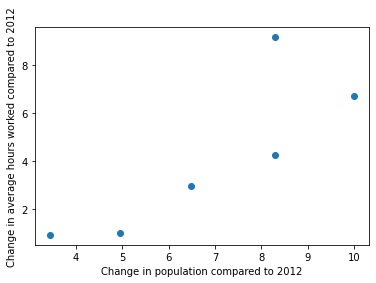

In [57]:
# Correlation between change in Population and change in average hours worked compared to 2012


plt.scatter(cor_emp_df.iloc[:,0],cor_emp_df.iloc[:,1])

population_change = cor_emp_df.iloc[:,0]

hours_wkd_change = cor_emp_df.iloc[:,1]

correlation = st.pearsonr(population_change,hours_wkd_change)

plt.xlabel('Change in population compared to 2012')

plt.ylabel('Change in average hours worked compared to 2012')

print(f'The correlation between changes in population and average hours worked compared to 2012 is {round(correlation[0],2)}')

plt.savefig('results/Change population vs hours worked')

plt.show

The correlation between changes in population and average hours worked per individuals employed compared to 2012 is nan


C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


<function matplotlib.pyplot.show(*args, **kw)>

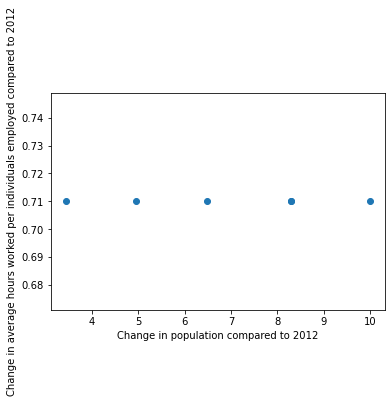

In [58]:
# Correlation between change in population and change in average hours worked per number of people employed compared 2012


plt.scatter(cor_emp_df.iloc[:,0],cor_emp_df.iloc[:,2])

population_change = cor_emp_df.iloc[:,0]

indv_hours_change = cor_emp_df.iloc[:,2]

correlation = st.pearsonr(population_change,indv_hours_change)

plt.xlabel('Change in population compared to 2012')

plt.ylabel('Change in average hours worked per individuals employed compared to 2012')

print(f'The correlation between changes in population and average hours worked per individuals employed compared to 2012 is {round(correlation[0],2)}')

plt.savefig('results/Change population vs hours worked per individuals employed')

plt.show

The correlation between changes in averge hours worked and average hours worked per individuals employed compared to 2012 is nan


<function matplotlib.pyplot.show(*args, **kw)>

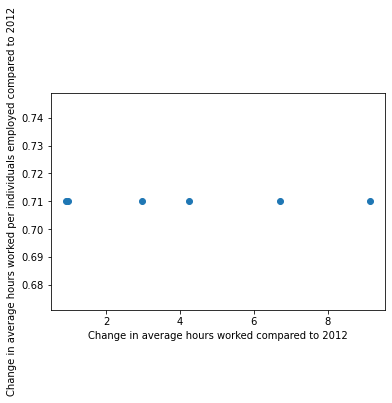

In [59]:
# Correlation between change in average hours worked per annum and change in average hours worked per number of people employed compared 2012

plt.scatter(cor_emp_df.iloc[:,1],cor_emp_df.iloc[:,2])

hours_wkd_change = cor_emp_df.iloc[:,1]

indv_hours_change = cor_emp_df.iloc[:,2]

correlation = st.pearsonr(hours_wkd_change,indv_hours_change)

plt.xlabel('Change in average hours worked compared to 2012')

plt.ylabel('Change in average hours worked per individuals employed compared to 2012')

print(f'The correlation between changes in averge hours worked and average hours worked per individuals employed compared to 2012 is {round(correlation[0],2)}')

plt.savefig('results/Change average hours worked vs hours worked per individuals employed')

plt.show

In [60]:
#From Aroosa
labour_force = pd.read_csv('resources/labour_force_data.csv')
labour_force

,Year,Employed total Persons,Employed full-time Persons,Employed part-time Persons,Employment to population ratio Persons,Labour force total Persons,Participation rate Persons,Not in the labour force (NILF) Persons,Civilian population aged 15-64 years Persons,Civilian population aged 15-64 years Males,Civilian population aged 15-64 years Females
0,2012,11133.0,7953.6,3179.4,73.0,11767.2,77.1,3490.2,15257.4,7616.9,7640.5
1,2013,11136.7,7852.5,3284.2,72.1,11827.3,76.6,3612.1,15439.4,7692.8,7746.6
2,2014,11306.8,7974.6,3332.2,72.4,12031.8,77.1,3580.6,15612.4,7770.2,7842.2
3,2015,11571.2,8148.8,3422.3,73.3,12269.7,77.7,3511.3,15781.0,7841.1,7940.0
4,2016,11684.7,8133.6,3551.2,73.1,12402.0,77.6,3588.4,15990.4,7937.3,8053.1
5,2017,12047.8,8419.7,3628.2,74.4,12755.7,78.7,3444.0,16199.7,8038.7,8161.0
6,2018,12282.2,8565.8,3716.3,74.8,12922.5,78.7,3495.3,16417.7,8149.2,8268.5


In [61]:
employ_status = pd.read_csv('resources/employment_status.csv')
employ_status

,Year,Employed total Persons,Employed full-time Persons,Employed part-time Persons
0,2012-2013,11133.0,7953.6,3179.4
1,2012-2013,11136.7,7852.5,3284.2
2,2012-2014,11306.8,7974.6,3332.2
3,2012-2015,11571.2,8148.8,3422.3
4,2012-2016,11684.7,8133.6,3551.2
5,2012-2017,12047.8,8419.7,3628.2
6,2012-2018,12282.2,8565.8,3716.3


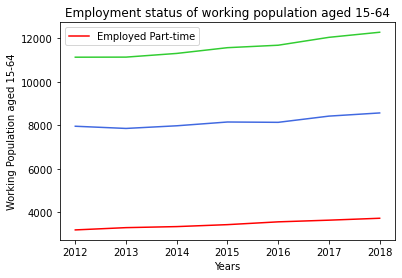

In [62]:
years = labour_force.iloc[:, 0 ]

employ_data, = plt.plot(years,labour_force.iloc[:, 1],color="limegreen", label= "Employed total")

employ_data1, = plt.plot(years,labour_force.iloc[:, 2],color="royalblue",label= "Employed full-time")

employ_data2, =plt.plot(years,labour_force.iloc[:, 3],color="red", label= "Employed Part-time")


# Create a legend for our chart
plt.legend(handles=[employ_data, employ_data1], loc="best")
plt.legend(handles=[ employ_data2], loc="best")
# plt.figure(figsize=(10,4))
plt.xlabel("Years") 
plt.ylabel("Working Population aged 15-64") 
plt.title("Employment status of working population aged 15-64")
plt.show()

Text(0, 0.5, 'Number of people employed')

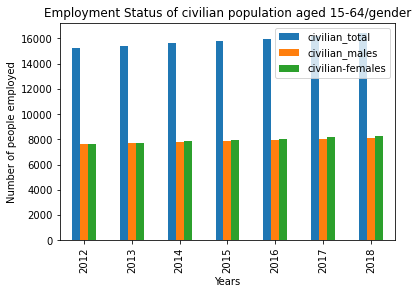

In [63]:
plotdata = pd.DataFrame({
    "civilian_total":[15257.4, 15439.4, 15612.4, 15781, 15990.4, 16199.7, 16417.7],
    "civilian_males":[7616.9, 7692.8, 7770.2, 7841.1, 7937.3, 8038.7, 8149.2],
    "civilian-females":[7640.5, 7746.6, 7842.2, 7940, 8053.1, 8161, 8268.5]
    }, 
    index=["2012", "2013", "2014", "2015", "2016", "2017", "2018"])

plotdata.plot (kind="bar")
plt.title("Employment Status of civilian population aged 15-64/gender")
plt.xlabel("Years")
plt.ylabel("Number of people employed")

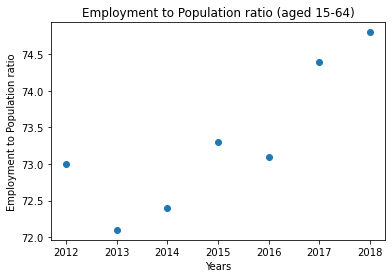

In [64]:
plt.scatter(labour_force.iloc[:,0],labour_force.iloc[:,4])
plt.title('Employment to Population ratio (aged 15-64)')
plt.xlabel('Years')
plt.ylabel('Employment to Population ratio')
plt.show() 

The correlation between both factors is 0.91


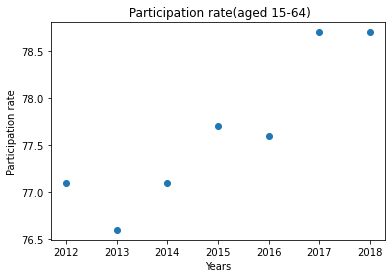

In [65]:
# years =labour_force.iloc[:,0]
employ_ratio = labour_force.iloc[:,0]
civilian_pop= labour_force.iloc[:,6]
correlation = st.pearsonr(employ_ratio,civilian_pop)
plt.scatter(employ_ratio, civilian_pop)
plt.title(' Participation rate(aged 15-64)')
plt.xlabel('Years')
plt.ylabel('Participation rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.99


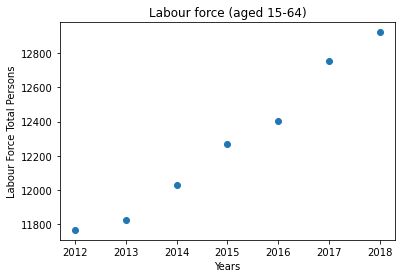

In [66]:
employ_ratio = labour_force.iloc[:,0]
civilian_pop= labour_force.iloc[:,5]
correlation = st.pearsonr(employ_ratio,civilian_pop)
plt.scatter(employ_ratio, civilian_pop)
plt.title('Labour force (aged 15-64)')
plt.xlabel('Years')
plt.ylabel('Labour Force Total Persons')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

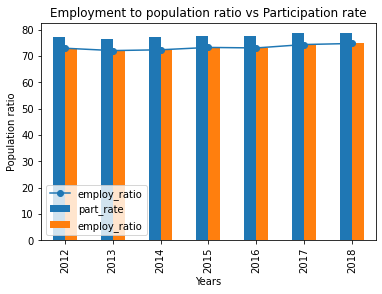

In [67]:
rate = pd.DataFrame(
    {'Year': ["2012", "2013", "2014", "2015", "2016", "2017", "2018"],
     'employ_ratio': [73, 72.1, 72.4, 73.3, 73.1, 74.4, 74.8,]})

# rate2 = pd.DataFrame({'Year': ['jan', 'feb'], '2014_val': [4, 5]})

rate2 = pd.DataFrame(
    {'Year': ["2012", "2013", "2014", "2015", "2016", "2017", "2018"],
     'part_rate': [77.1, 76.6, 77.1, 77.7, 77.6, 78.7, 78.7]})

merge = pd.merge(rate, rate2, how='outer')
#  = pd.merge(df_13_14, right_2014_target, how='outer')

ax = merge[['Year', 'employ_ratio']].plot(
    x='Year', linestyle='-', marker='o')
merge[['Year', 'part_rate', 'employ_ratio']].plot(x='Year', kind='bar',
                                                        ax=ax)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Population ratio")
plt.title("Employment to population ratio vs Participation rate")
plt.show()

The r-squared is: 0.9492696062268328


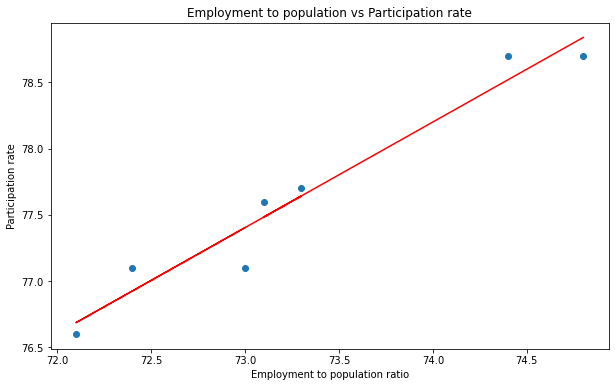

In [68]:
civilian_pop = labour_force.iloc[: ,4]
x_values = civilian_pop
ratio = labour_force.iloc[: ,6]
y_values =  ratio


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.rcParams['figure.figsize']=(10,10)
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Employment to population vs Participation rate")
plt.xlabel('Employment to population ratio')
plt.ylabel('Participation rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [69]:
#From Nooshin
# Reading CSV
p_rate_df = pd.read_csv("resources/Participation_rate.csv")
p_rate_df.head()

,Dates,People (%),Males (%),Females (%)
0,Dec-10,65.6,72.6,58.8
1,Jan-11,65.8,72.8,58.9
2,Feb-11,65.5,72.5,58.7
3,Mar-11,65.6,72.4,59.0
4,Apr-11,65.4,72.2,58.7


In [70]:
# Set x axis and tick locations
x_axis = np.arange(len(p_rate_df))
tick_locations = [value for value in x_axis]

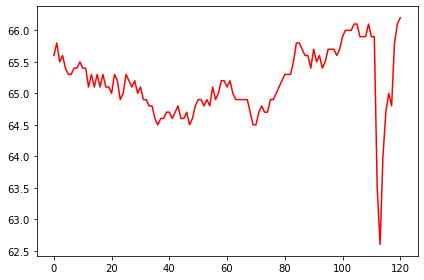

In [71]:
 # Create a chart for people participation
plt.plot(x_axis, p_rate_df["People (%)"], color='r')

plt.tight_layout()

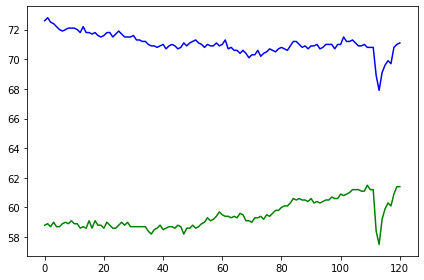

In [72]:
 # Create a chart for comparing participation rate based on gender
 plt.plot(x_axis, p_rate_df["Males (%)"], color='blue')
 plt.plot(x_axis, p_rate_df["Females (%)"], color='green')

plt.tight_layout()